<a href="https://www.kaggle.com/code/chrisw1212/breast-cancer-machine-learning-model?scriptVersionId=163164730" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Breast Cancer Machine Learning Model

## Introduction

The goal of this project is to build a classification machine learning model trained on diagnostic breast cancer data. The trained machine learning model will be used to predict whether a breast cell nucleus is malignant or benign. 

We want to answer the following question:
####  Which characteristics of a breast cell nucleus are the most predictive of a malignant cell?</i><br>


| 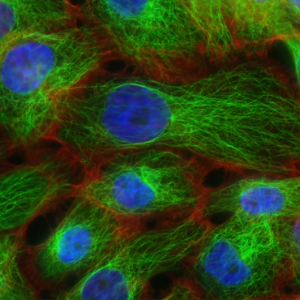 |
|:--:| 
| *Stress Fibers and Microtubules in Human Breast Cancer Cells. Created by Christina Stuelten, Carole Parent, 2011* |

## Breast Cancer Cell Dataset

For this project, I will use a public Kaggle dataset of diagnostic breast cancer data: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

The dataset can also be found in UC Irvine's Machine Learning Repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

According to the dataset documentation, the dataset contains features related to characteristics of cell nuclei. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.<sup>1</sup>

The dataset has:

<b>569 rows</b> - each row represents a different digitized image of a breast mass

<b>33 columns</b>

|       Column Name       | Data Type | Description |
| :---------------------- | :--------: | :---------- |
| ID number               | int64  | ID of an image |
| Diagnosis                 | object       | M = Malignant, B = Benign     |
| Radius                   | float64       | Distance from center of nucleus to perimeter         |
| Texture          | float64      | Standard deviation of gray-scale values         |
| Perimeter                  | float64       | Distance around perimeter of nucleus           |
| Area            | float64       | Area of nucleus           |
| Smoothness             | float64 | Local variation in radius lengths           |
| Compactness                | float64       | Compactness = (perimeter<sup>2</sup>) / (area - 1.0)          |
| Concavity                     | float64      | Severity of concave portions of the contour          |
| Concave points                  | float64       | Number of concave portions of the contour           |
| Symmetry                   | float64       | Measure of nucleus symmetry           |
| Fractal dimension                    | float64       | "Coastline approximation" - 1           |

All columns besides ID number and diagnosis have three features: A mean, standard error, and "worst" (i.e. mean of 3 largest values). For example, the radius column, corresponding to the measured nucleus radius, has three columns: radius_mean, radius_se, and radius_worst.

So, the radius_mean value for a row would refer to the average radius of a breast cell nucleus in the digitized image.

All features (besides ID number and diagnosis) have four significant digits.

## Import Python Libraries

We'll build our machine learning model using Python, one of the most popular programming languages for data analysis and machine learning. We can start by importing useful code libraries.

In [1]:
# Numerical Operations and Data Manipulation
import numpy as np 
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Standardizing Numerical Dataset Values
from sklearn.preprocessing import StandardScaler

# Display All of the Columns in DataFrames
pd.set_option('display.max_columns', None)

# Machine Learning Models
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter Tuning and Creating Training/Testing Data Splits
from sklearn.model_selection import GridSearchCV, train_test_split

# Model Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# Suppress Specific Warnings to Improve Readability
import warnings

## Import the Diagnostic Breast Cancer Dataset

In [2]:
# Convert the CSV file to a DataFrame object
breast_cancer_df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

## Initial Data Exploration
Let's start by examining the first 10 rows of the data

In [3]:
breast_cancer_df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


The final column, "Unnamed: 32", seems to only have NaN values.

Next, we'll examine information about the columns and their data types.

In [4]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Out of 569 rows, no column is missing data besides the "Unnamed: 32" column which only has null values. 

## Removing Irrelevant Columns

We will remove the "Unnamed: 32" column along with the "id" column since neither will be useful for our analysis. 

In [5]:
# Remove irrelevant columns from the DataFrame
breast_cancer_df.drop(columns=['id', 'Unnamed: 32'], axis=1, inplace=True)

Let's confirm the columns no longer exist.

In [6]:
# Confirm columns were successfully removed
breast_cancer_df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


Great! The columns have been removed. We now want to confirm that our data does not have any remaining null values.

In [7]:
# Count the number of null values in each column
breast_cancer_df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Each column has zero null values. 

## Determine Class Balance

Each digitized image either contains benign (i.e. non-cancerous) or malignant (i.e. cancerous) breast cells. We should determine how many are benign and how many are malignant. 

In [8]:
# Print the total number of each type of digitized image diagnosis
print(breast_cancer_df['diagnosis'].value_counts())

print()

# Print the percentage of each type of digitized image diagnosis
print(breast_cancer_df['diagnosis'].value_counts(normalize=True))

diagnosis
B    357
M    212
Name: count, dtype: int64

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64


Out of 569 digitized images in our dataset:

* 357 contained benign breast cells (62.7417%)
* 212 contained malignant breast cells (37.2583%)

We do not have a significant (>90%) class imbalance, so we should not have class issues with classification modeling. We will use stratification to replicate this class balance in the training data. 

## Examine Descriptive Statistics

Let's obtain descriptive statistics of our numerical features.

In [9]:
# Obtain descriptive statistics of DataFrame
breast_cancer_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The max area_mean is 2501.000000 while the max fractional_dimension_mean is 0.09744. In other words, the large differences in numbers suggests that we should standardize our data. Standardizing the data will prevent models from overprioritizing features simply because they have larger numbers. 

## Standardize the Data

We can standardize the data by using a StandardScaler object.

We should first separate the categorical target variable from the numerical features, standardize the numerical features, and then rejoin the dataset back together. Standarizing a categorical variable will lead to errors.

In [10]:
# Separate dependent 'diagnosis' variable from the independent features
y = breast_cancer_df['diagnosis']
x = breast_cancer_df.drop(columns=['diagnosis'])

# Standardize the DataFrame with only numerical features
scaler = StandardScaler()
numerical_features_standardized_df = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Rejoin the categorical column to the now standardized numerical features
breast_cancer_standardized_df = pd.concat([y, numerical_features_standardized_df], axis=1)

# Examine the first 10 rows of the standardized DataFrame
breast_cancer_standardized_df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,M,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,-0.255070,-0.592662,-0.321304,-0.289258,0.156347,0.445544,0.160025,-0.069124,0.134119,0.486846,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,M,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,0.149883,-0.804940,0.155410,0.298627,-0.909030,-0.651568,-0.310141,-0.228089,-0.829666,-0.611218,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,M,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,0.643623,0.290561,0.490051,0.233722,0.588031,0.268933,-0.232554,0.435349,-0.688004,0.611669,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,M,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,-0.356850,-0.389818,-0.227743,-0.352403,-0.436677,0.533290,0.120568,0.075243,0.107482,-0.017363,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,M,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,-0.388250,0.693345,-0.409420,-0.360764,0.036008,2.609587,1.509848,0.409395,-0.321136,2.377346,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


Our numerical data is now standardized, which will be important for modeling. 

Next, we will visualize the relationships between our features to assist in the feature engineering process. Feature engineering is where we select, transform, and extract features to help build a more predictive model.

## Visualizing Feature Relationships For Benign vs Malignant Cell Images with Box Plots

We have 30 features. We can set up box plots in groups of 10 to get a sense of how the data is distributed and what outliers exist.


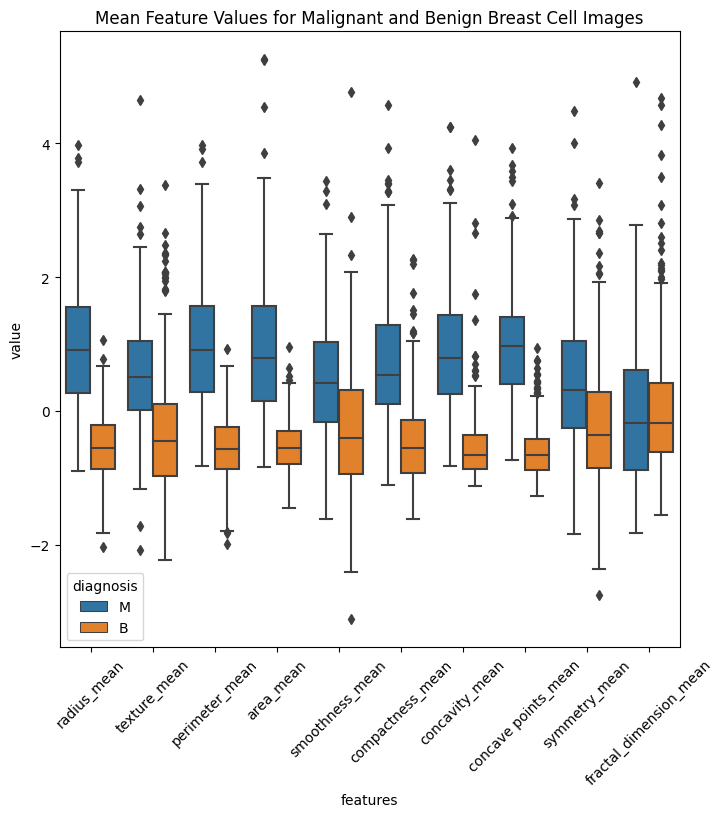

In [11]:
# Create 3 subsets, each with ten numerical features
first_subset_df = pd.concat([y, numerical_features_standardized_df.iloc[:, :10]], axis=1)
first_subset_df = pd.melt(first_subset_df, id_vars = 'diagnosis', var_name='features', value_name='value')
second_subset_df = pd.concat([y, numerical_features_standardized_df.iloc[:, 10:20]], axis=1)
second_subset_df = pd.melt(second_subset_df, id_vars = 'diagnosis', var_name='features', value_name='value')
third_subset_df = pd.concat([y, numerical_features_standardized_df.iloc[:, 20:30]], axis=1)
third_subset_df = pd.melt(third_subset_df, id_vars = 'diagnosis', var_name='features', value_name='value')

# Set the figure size
plt.figure(figsize=(8, 8))

# Plot the first subset of box plots
sns.boxplot(x='features', y='value', hue='diagnosis', data=first_subset_df)
plt.title('Mean Feature Values for Malignant and Benign Breast Cell Images')
plt.xticks(rotation=45)
plt.show()

We notice right away that the median lines for the standardized orange benign mean values tend to be lower than the median lines for the blue malignant values. 

A few observations:
* The average radius of malignant breast cells in images is larger than benign cells
* Other metrics related to cell size such as perimeter and area also share this relationship
* However, there are outlier benign cells that just happen to have the larger average radius of a malignant cell
* The mean fractal dimension box plots have very similar medians and therefore this feature probably lacks predictive power for diagnosis differentiation

Let's take a look at the box plots for standard error of features.

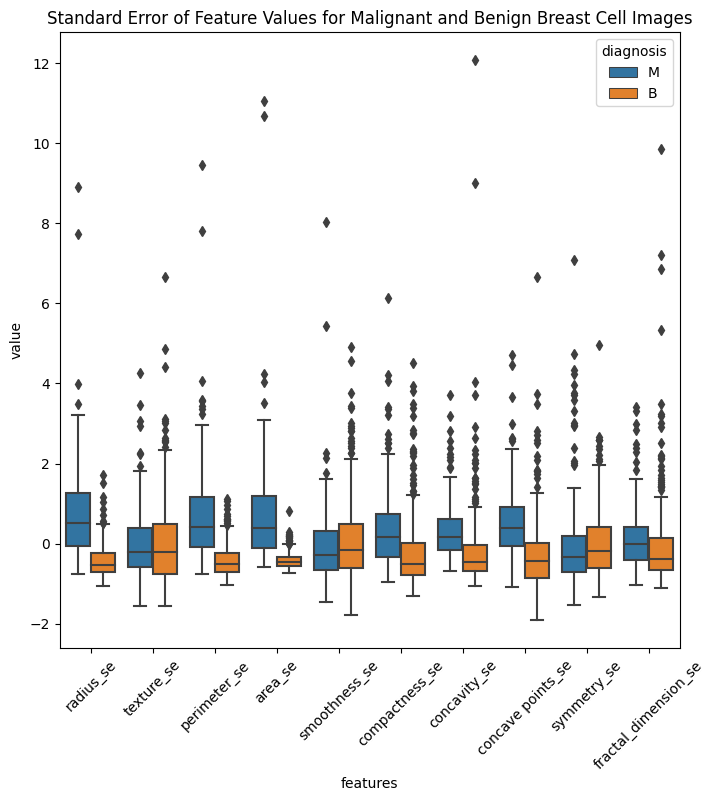

In [12]:
# Set the figure size
plt.figure(figsize=(8, 8))

# Plot the second subset of box plots
sns.boxplot(x='features', y='value', hue='diagnosis', data=second_subset_df)
plt.title('Standard Error of Feature Values for Malignant and Benign Breast Cell Images')
plt.xticks(rotation=45)
plt.show()

* The features in this subset seem to be less distinct and therefore less predictive. Area_se, perimeter_se, and radius_se could have some predictive value, although we again notice a fair number of outlier benign cells that have similar sizes to malignant cells. 

* In addition, a small number of malignant cells have a smaller size typically associated with benign cells, as observed by the lower whisker of the blue malignant box plot covering the median value of the orange benign box plot.

* The best predictive model for this classification problem will need to take multiple features into consideration.

Let's look at the "worst" values (i.e. mean of the 3 largest values) for the features.

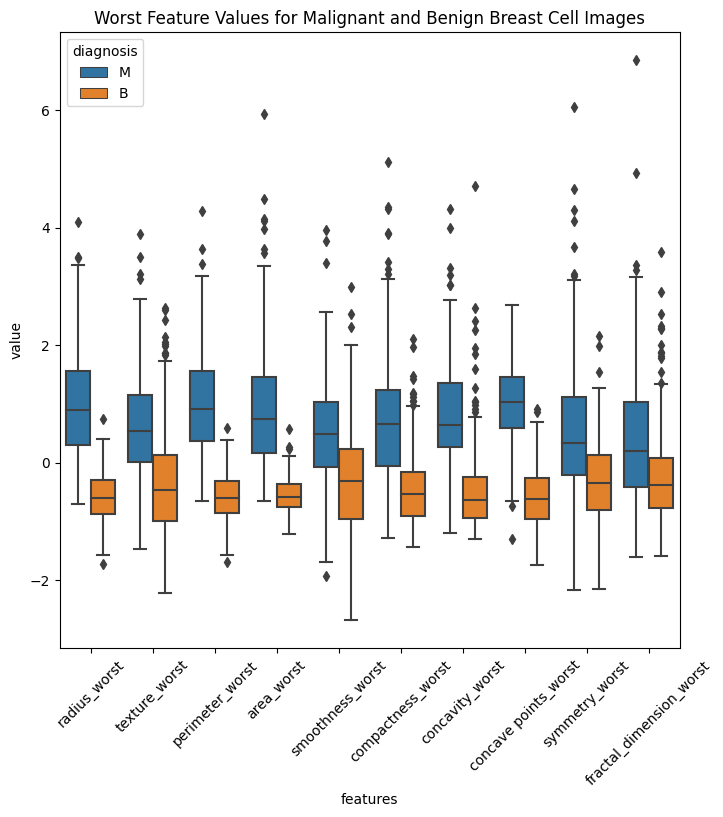

In [13]:
# Set the figure size
plt.figure(figsize=(8, 8))

# Plot the third subset of box plots
sns.boxplot(x='features', y='value', hue='diagnosis', data=third_subset_df)
plt.title('Worst Feature Values for Malignant and Benign Breast Cell Images')
plt.xticks(rotation=45)
plt.show()

* Radius_worst may have some predictive value
* Area_worst also seems promising for predictive value
* There are quite a few outlier values for both benign and malignant cells, typically higher-end outliers

## Visualizing Feature Relationships For Benign vs Malignant Cell Images with Swarm Plots

The box plots indicated that we have a fair number of outliers in our dataset of 569 digitized images of breast cells. Since our dataset is relatively small, we can use swarm plots to more clearly see the distributions of benign and malignant cell nuclei for values of each feature. The swarm plots will more clearly show where outliers are mixing with typical values for the other diagnosis.

CPU times: user 6.55 s, sys: 11.1 ms, total: 6.56 s
Wall time: 6.57 s


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

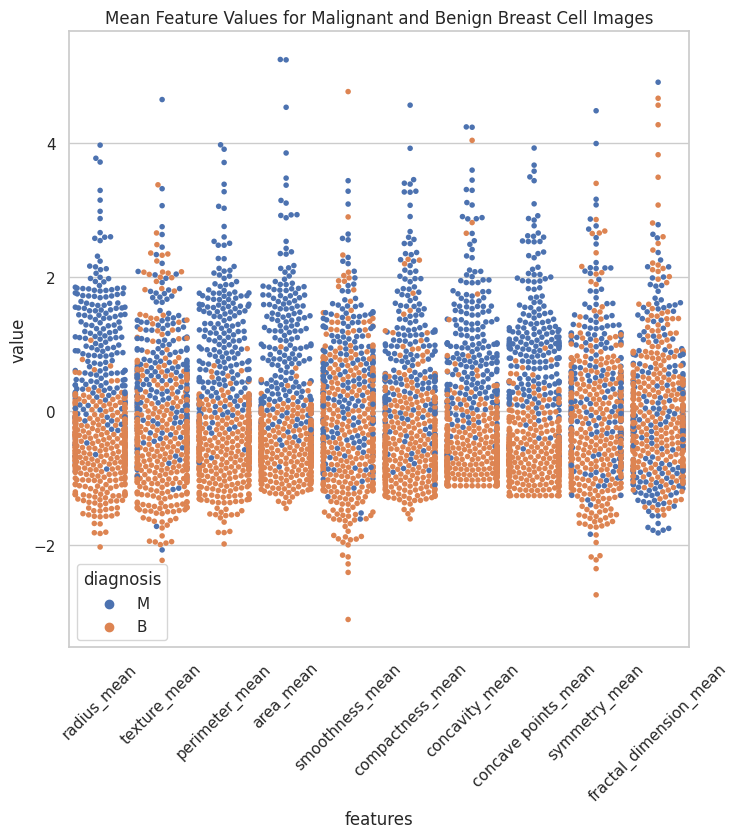

In [14]:
%%time
# Set the figure size
plt.figure(figsize=(8, 8))

# Change settings to improve visibility of plot
sns.set(style='whitegrid')

# Suppress future warnings for readability
warnings.simplefilter(action='ignore', category=FutureWarning)

# Suppress warnings related to overlapping points in the plot
warnings.simplefilter(action='ignore', category=UserWarning)

# Create swarm plot for first subset
sns.swarmplot(x='features', y='value', hue='diagnosis', data=first_subset_df, size=4)
plt.title('Mean Feature Values for Malignant and Benign Breast Cell Images')
plt.xticks(rotation=45)

The swarm plot more clearly shows how outliers are mixing in with typical values for the other diagnosis.

* In the fractal_dimension_mean plot, malignant and benign observations are distributed throughout the plot. This relatively even distribution indicates once again that this feature lacks predictive power.
* There is a greater degree of separation in the radius_mean and area_mean plots. We again highlight that features related to nucleus size have apparent predictive power.
* The plots for perimeter_mean and concave points_mean also seem to suggest predictive power.

Let's plot swarm plots for two remaining subsets.

CPU times: user 22.5 s, sys: 5.27 ms, total: 22.5 s
Wall time: 22.6 s


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

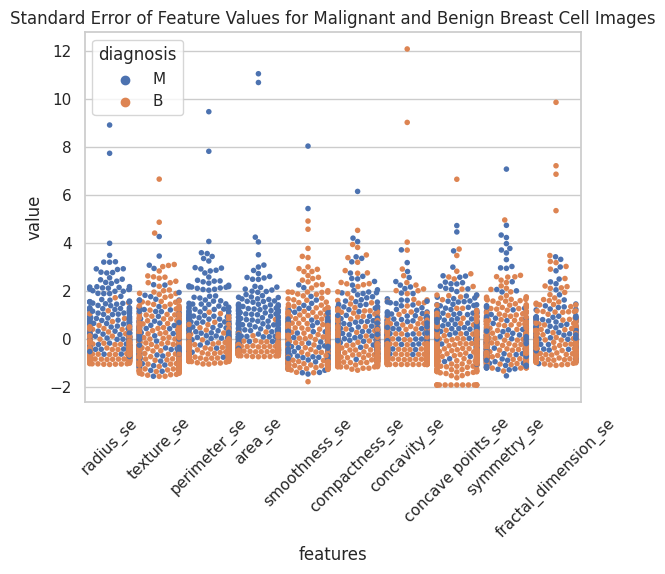

In [15]:
%%time
# Create swarm plot for second subset
sns.swarmplot(x='features', y='value', hue='diagnosis', data=second_subset_df, size=4)
plt.title('Standard Error of Feature Values for Malignant and Benign Breast Cell Images')
plt.xticks(rotation=45)

* The area_se feature looks like the most promising predictive feature of all features related to standard error

CPU times: user 11.5 s, sys: 6.01 ms, total: 11.5 s
Wall time: 11.5 s


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

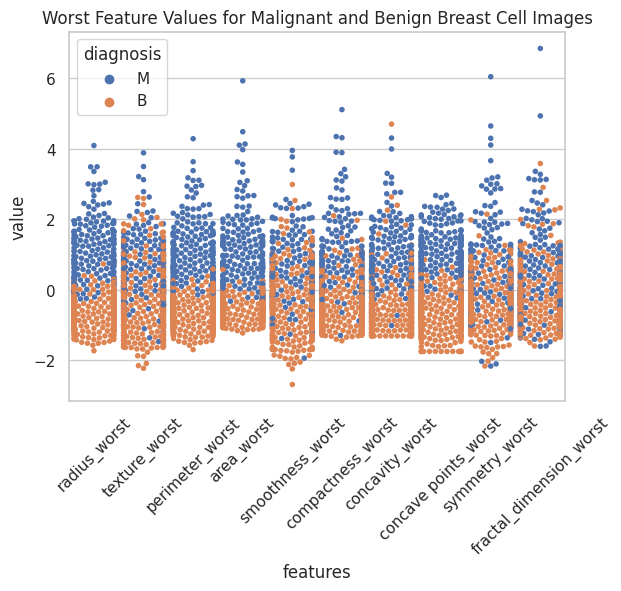

In [16]:
%%time
# Create swarm plot for third subset
sns.swarmplot(x='features', y='value', hue='diagnosis', data=third_subset_df, size=4)
plt.title('Worst Feature Values for Malignant and Benign Breast Cell Images')
plt.xticks(rotation=45)

* The perimeter_worst and area_worst features seem highly predictive
* concave points_worst also seems predictive


<br>Now that our swarm plots have been made, we'll turn warnings back on.

In [17]:
# Re-enable all warnings
warnings.resetwarnings()

## Feature Correlation Heatmap

We have identified the following features with the most promising predictive power:
1) radius_mean<br>
2) perimeter_mean<br>
3) area_mean<br>
4) concave_points mean<br>
5) area_se<br>
6) perimeter_worst<br>
7) area_worst<br>

Now that we have an idea of which features might be most predictive for our classification model, we can build a correlation heatmap to better understand how features are correlated with each other.

Understanding feature correlations is an important step for setting up the feature engineering phase. 

<Axes: title={'center': 'Feature Correlation Heatmap'}>

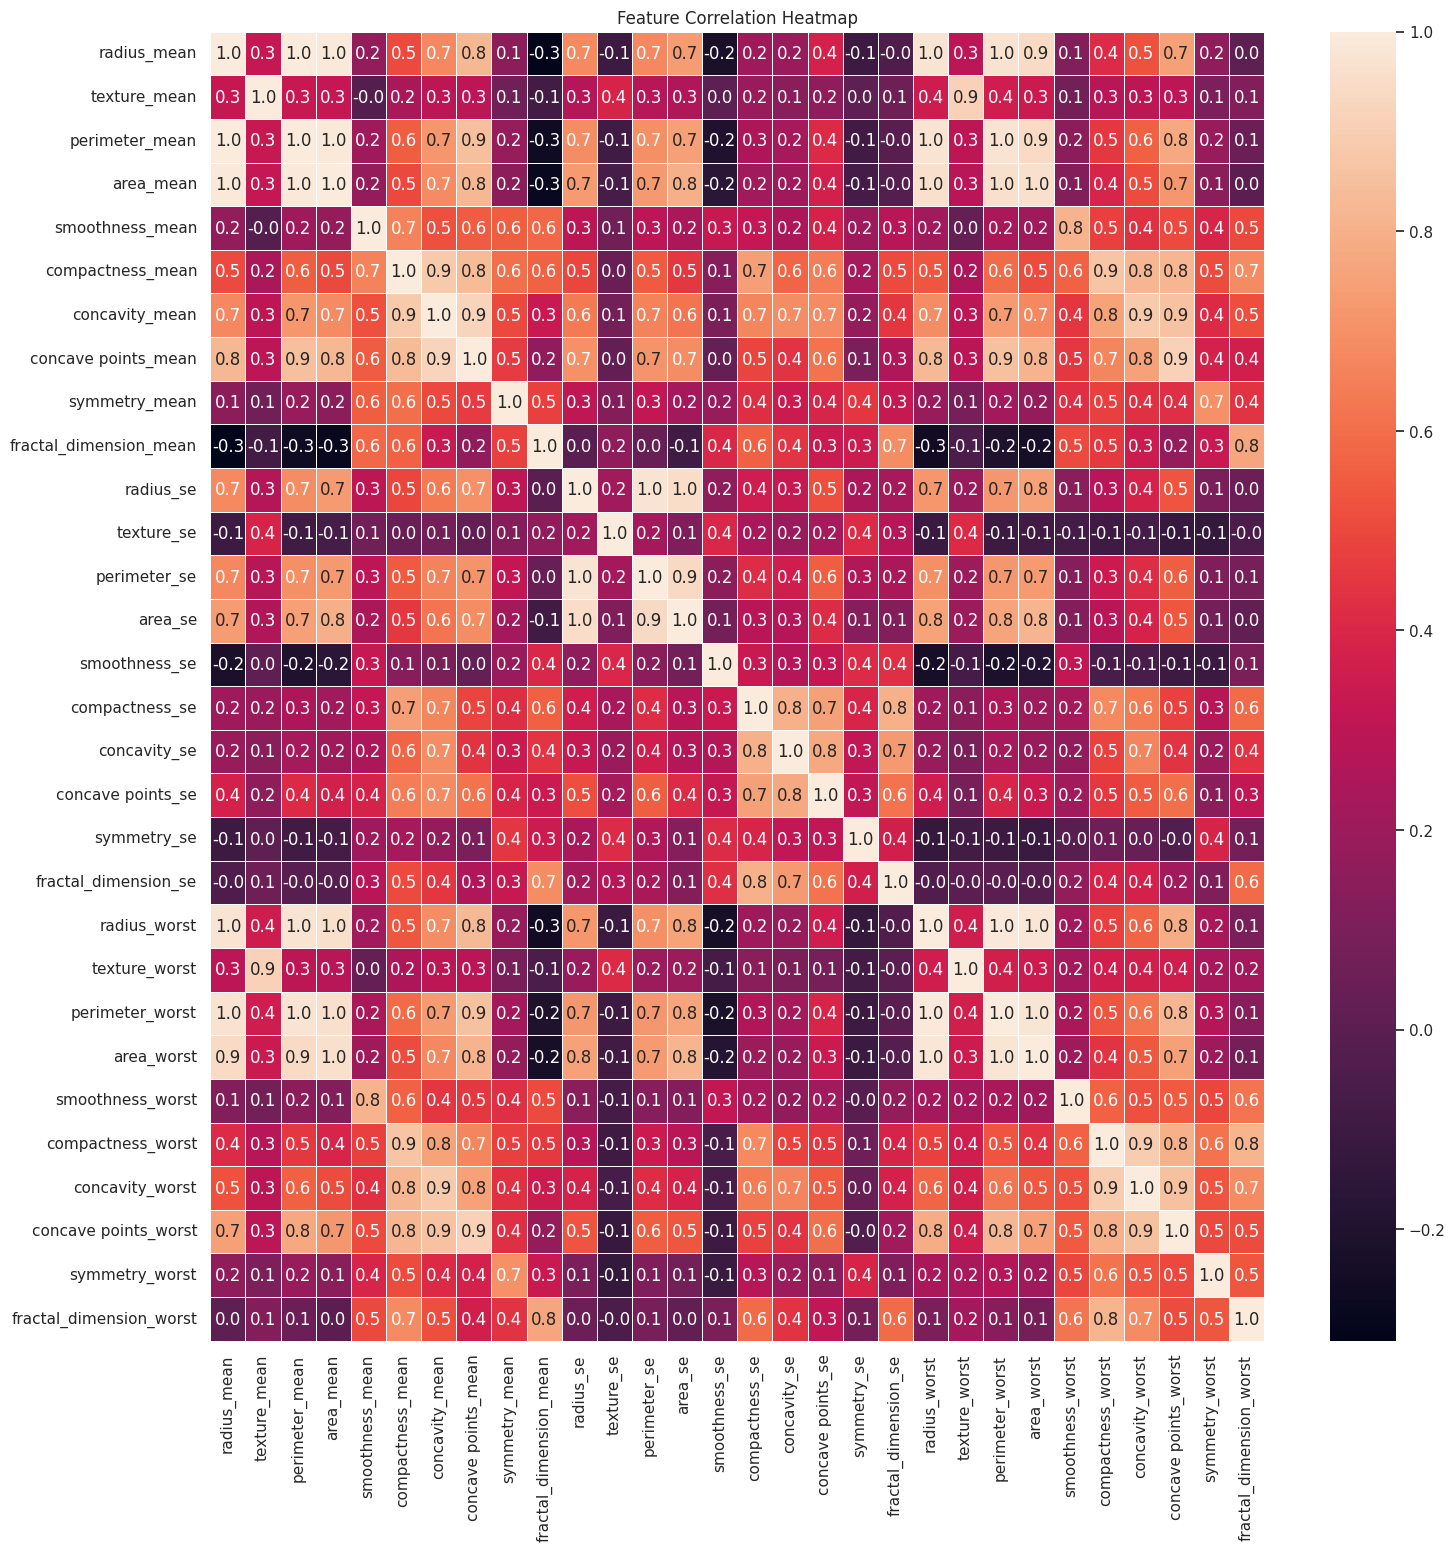

In [18]:
# Plot the feature correlation heatmap 
fig, ax = plt.subplots(figsize=(17,17))
plt.title('Feature Correlation Heatmap')
sns.heatmap(numerical_features_standardized_df.corr(), annot=True, linewidth=0.5, fmt='0.1f', ax=ax)

The heatmap compares each of the 30 features with all 30 features, including each feature with itself. Therefore, there are 900 values in the heatmap.

* Each feature has a 1.0 (i.e. 100%) correlation with itself
* Correlations have a range of [-1, 1]

The heatmap is fairly complex with 900 values. We want to identify different features with high correlations with each other. Let's create another smaller correlation heatmap for the 7 features we identified as being most promising for predictive power.


<Axes: title={'center': 'Feature Correlation Heatmap'}>

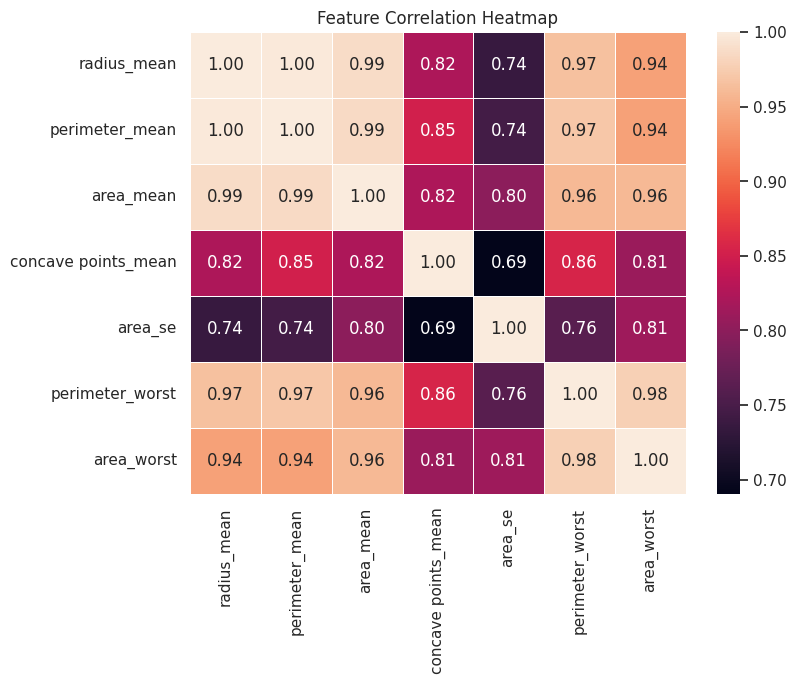

In [19]:
# Filter the DataFrame for the 7 most predictive features
predictive_features = ['radius_mean', 'perimeter_mean',
                       'area_mean', 'concave points_mean',
                       'area_se', 'perimeter_worst', 'area_worst']
predictive_numerical_features_df = numerical_features_standardized_df[predictive_features]

# Plot the feature correlation heatmap 
fig, ax = plt.subplots(figsize=(8,6))
plt.title('Feature Correlation Heatmap')
sns.heatmap(predictive_numerical_features_df.corr(), annot=True, linewidth=0.5, fmt='0.2f', ax=ax)

Many of the most predictive features are highly correlated with each other. Machine learning models such as XGBoost models and Random Forest models are generally robust to multicollinearity between features as opposed to linear regression models. 

Therefore, we will avoid using a linear regression model for this problem. 

## Choosing a Model

After exploratory data analysis, I will be using an XGBoost model for classification. XGBoost is not the only valid option, as a Random Forest model would also work. However, I am choosing XGBoost because:

1) We have 30 features, and XGBoost does a good job handling the complex relationships between many features

2) XGBoost will be robust to multicollinearity between features

2) XGBoost is fast and efficient compared to other machine learning options, since it implements parallel processing

3) XGBoost offers more hyperparameters for tuning the model

4) XGBoost also has options to plot feature importance, which is very useful to our research question

Before we set up training and testing data for our model, we need to numerically encode the categorical diagnosis variable.

## Encode the Categorical Diagnosis Target Variable

The XGBoost model needs our categorical variable to be encoded as a numerical variable. Let's encode the 'B' (benign) diagnosis as 0 and the 'M' (malignant) diagnosis as 1.

In [20]:
# Encode the diagnosis column as a new column
encoding_dict = {'B': 0, 'M': 1}
breast_cancer_standardized_df['diagnosis_encoded'] = breast_cancer_standardized_df['diagnosis'].map(encoding_dict)

# Confirm the new encoded column was successfully created
breast_cancer_standardized_df[['diagnosis_encoded', 'diagnosis']].head()

,diagnosis_encoded,diagnosis
0,1,M
1,1,M
2,1,M
3,1,M
4,1,M


Great! We can now drop the original diagnosis column.

In [21]:
# Drop the original categorical column
breast_cancer_standardized_df.drop(columns=['diagnosis'], axis=1, inplace=True)

# Confirm the column no longer exists
if 'diagnosis' not in breast_cancer_standardized_df.columns:
    print('Removal was successful!')
else:
    print("Error: The column was not removed.")

Removal was successful!


The column was removed, and we have our encoded target variable. We are now ready to create model training and model testing subsets of our data.

## Create Training and Testing Subsets 

Now we want to:
1) Separate the target variable from the independent features<br>
2) Split the data into a training subset and a testing subset (I will choose an 80/20 train/test split)<br>
3) Maintain the same class balance of malignant vs benign cell nuclei in our subsets through stratification<br>
4) Set the random state to zero so that our random results are reproducible


In [22]:
# Split the target variable from features
target = breast_cancer_standardized_df['diagnosis_encoded']
features = breast_cancer_standardized_df.drop(['diagnosis_encoded'], axis=1)

# Suppress deprecation warnings for readability
warnings.simplefilter(action='ignore', category=DeprecationWarning)

# Split the data into training and testing subsets
features_train, features_test, target_train, target_test = train_test_split(
                                                                            features,
                                                                            target,
                                                                            test_size = 0.2,
                                                                            stratify=target,
                                                                            random_state = 0
                                                                            )

## Create a Random Forest Machine Learning Model

I'm going to use the F1 score, the harmonic mean of the precision and recall scores, to evaluate my model. A further explanation of model score descriptions are provided later in this notebook.

In short, the F1 score takes into account both how accurate the model is when it predicts an image contains malignant cells and how many malignant images in the dataset it was able to correctly identify. 

Let's go ahead and instantiate our XGBoost model, and use a GridSearch object to tune the model's hyperparameters based on optimizing the F1 score.

In [23]:
# Instantiate the XGBoost model
xgboost_model = XGBClassifier(objective='binary:logistic', random_state=0)

# Assign a dictionary of hyperparameters to search over using a cross-validation grid search
cv_hyperparameters = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

# Assign a dictionary of scoring metrics to capture
evaluation_metrics_dict = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate a GridSearch object using the model, evaluation metrics, and target metric of F1 score
xgboost_cv = GridSearchCV(xgboost_model, cv_hyperparameters, scoring=evaluation_metrics_dict, cv=5, refit='f1')

Now we fit the GridSearch model to our training data. 

In [24]:
%%time
# Fit the GridSearch object to the training data. 
xgboost_cv.fit(features_train, target_train)

CPU times: user 28.7 s, sys: 168 ms, total: 28.9 s
Wall time: 7.37 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1', scoring={'recall', 'accuracy', 'precision', 'f1'})

We can now access the best set of hyperparameters for our XGBoost model through the best_params_ attribute of the GridSearch object

In [25]:
xgboost_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 15,
 'subsample': 0.7}

We can use this set of optimal hyperparameters to test our trained model. 

## Testing and Evaluating the XGBoost Model

Our XGBoost model has been trained and is ready to start making predictions! 

We'll gather its predictions on the testing data and evaluate its performance.

In [26]:
# Create predictions from our trained model on the unseen testing data
target_predictions = xgboost_cv.predict(features_test)

# Determine the accuracy score
accuracy_score = accuracy_score(target_test, target_predictions)
print('Accuracy Score:', accuracy_score)

# Determine the precision score
precision_score = precision_score(target_test, target_predictions)
print('Precision Score:', precision_score)

# Determine the recall score
recall_score = recall_score(target_test, target_predictions)
print('Recall Score:', recall_score)

# Determine the F1 score
f1_score = f1_score(target_test, target_predictions)
print('F1 Score:', f1_score)

Accuracy Score: 0.9473684210526315
Precision Score: 0.9090909090909091
Recall Score: 0.9523809523809523
F1 Score: 0.9302325581395349


* The accuracy score of the model was about 94.74%. Out of all predictions made by the model, our model was correct 94.74% of the time in predicting whether an image contained malignant or benign cells. 

* The precision score of the model was about 90.91%. Out of all predictions that an image contained malignant cells, our model was correct 90.91% of the time.

* The recall score of the model was about 95.24%. Out of all images containing malignant cells in the testing data subset, our model correctly identified 95.24% as malignant.

* The F1 score of the model was about 93.02%. The F1 score is the harmonic mean of the precision and recall scores.

Since we chose the F1 score as our evaluation metric, our model finished with a 93.02% F1 score. 

This is an impressive result indicative of good classification performance in our model.


### Visualizing Model Performance with a Confusion Matrix

A confusion matrix is a 2x2 plot showing the number of true positives, true negatives, false positives, and false negatives made by the model. 

Let's generate the confusion matrix and see the results.

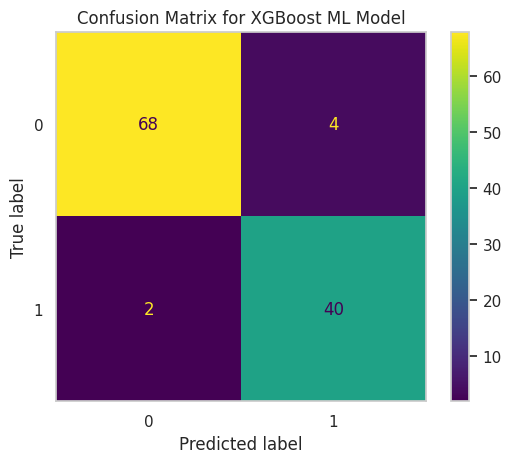

In [27]:
# Create the confusion matrix
xgboost_confusion_matrix = confusion_matrix(target_test, target_predictions)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=xgboost_confusion_matrix,
                                                  display_labels=xgboost_cv.classes_)

# Remove white gridlines and display the plot
confusion_matrix_display.plot()
plt.grid(False)
plt.title('Confusion Matrix for XGBoost ML Model')
plt.show()

# Re-enable deprecation warnings
warnings.resetwarnings()

Out of 114 unseen breast cell nuclei in the testing subset, our model had:

* 68 True Negatives (The model correctly predicted that an image contained benign breast cells)

* 2 False Negatives (The model incorrectly predicted that an image contained benign breast cells when they were actually malignant)

* 40 True Positives (The model correctly predicted that an image contained malignant breast cells)

* 4 False Positives (The model incorrectly predicted that an image contained malignant breast cells when they were actually benign)

Again, we find that our XGBoost model has impressive predictive power!

### Most Important Features to the XGBoost Machine Learning Model

Now that the model has been trained on the complex relationships between features that lead to either benign or malignant breast cell nuclei, we can see what the model 
determined to be the most important distinguishing features. 


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

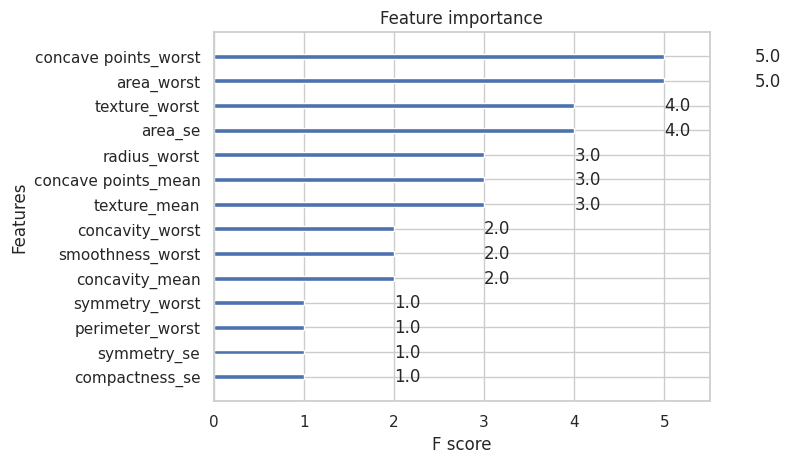

In [28]:
# Create a plot of feature importance
plot_importance(xgboost_cv.best_estimator_)

### Insights

* Our model determined that the worst concave points values and the worst area values were the best features to help differentiate benign and malignant cells. Recall that "worst" in this context refers to the mean of the three largest values. 

* During exploratory data analysis, we noted that features related to radius, perimeter, and area seemed most predictive. We also found that these features were highly correlated with each other, since they are all indicators of the size of the cell nucleus. A malignant breast cell nucleus tends to be larger than a benign breast cell nucleus, although there are a few outlier benign cell nuclei that just happen to be a larger size. Some malignant cell nuclei are also smaller outliers that are similar sizes to the typical benign nucleus size. 

* We also noted concave points as promising. The model found that the mean of the 3 largest concave points values in images was very useful in differentiating malignant cell nuclei from benign ones. 

* The model agrees with our assessment of area_se having high predictive power. The model found texture_worst to also have strong predictive power.

## Conclusion 
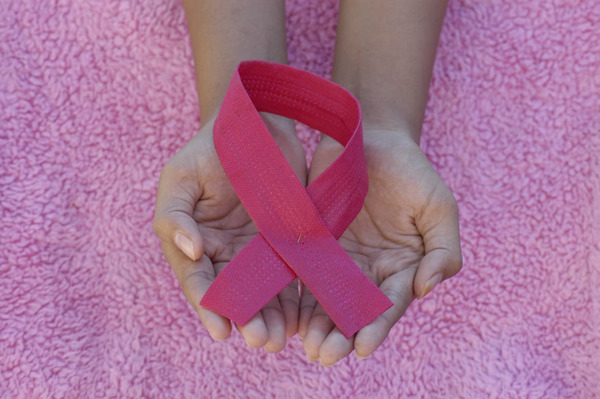

In this project, I used a diagnostic breast cancer dataset to train a machine learning model to classify cells as either benign or malignant.

After exploratory data analysis, I decided to use an XGBoost machine learning model. I thought that the XGBoost model would be robust against multicollinearity of features and would be well-suited for the larger number of features in the dataset.

I chose to evaluate the model based upon the F1 score. The recall score could also have been reasonable if I wanted to minimize the number of false negatives (predicting a breast cell nucleus is benign when it is actually malignant) at the cost of increasing false positives. However, I selected the F1 score to focus on both precision and recall. 

The XGBoost model had an F1 score of about 93.02%, which is an impressive initial result. Out of the testing dataset of 114 breast cell nuclei, the model made only 6 incorrect predictions. 

I used my XGBoost model to plot feature importance so that I could answer the initial research question. 


<br>The initial research question I had was:

####  Which characteristics of a breast cell nucleus are the most predictive of a malignant cell?</i><br>

Through both exploratory data analysis and our XGBoost machine learning model, we discovered that:
1) <b>The two most predictive features</b> for differentiating benign breast cell nuclei from malignant breast cell nuclei <b>were concave points_worst and area_worst</b>. These features involve the mean of the 3 largest numbers of concave points and the mean of the 3 largest nuclei areas in the digitized images.

2) <b>The next two most predictive features</b> for differentiating benign breast cell nuclei from malignant breast cell nuclei <b>were texture_worst and area_se</b>. These features involve the mean of the 3 largest standard deviations of gray-scale values and the standard error of nuclei areas in the digitized images.

<b>In other words, the most predictive features for determining the correct diagnosis for a given image are related to the area of the cells, the number of concave portions on the contour of the nuclei, and the standard deviation of gray-scale values of the nuclei.</b>

<b>In all three cases, images with malignant cells tended to have larger areas for nuclei, larger numbers of concave portions, and larger standard deviations of gray-scale values.</b>

## Recommendations for Further Research

The insights provided by the plot can assist us in attempting to build models with even higher performance: 

* We can use the identified features to exclude less relevant features from model training
* We can also experiment with combining features in some way
* We could experiment with other types of models like a Random Forest model and compare results to select a champion model

The insights can also be used for further breast cancer research, to help spot early warning signs of malignant cells in patients, and to help in the development of breast cancer treatment options.

## References

1) Wolberg, William, Mangasarian, Olvi, Street, Nick, and Street, W. (1995). Breast Cancer Wisconsin (Diagnostic). UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.